In [199]:
##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LinearRegression


In [132]:
warnings.filterwarnings('ignore')

In [133]:
##
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = None

In [134]:
##
submission = pd.read_csv('data/sample_submission.csv')
test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')
print(train.shape)

(750000, 12)


In [135]:
drop_cols = ['id']
cat_cols = ['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']
num_cols = [col for col in train.columns if col not in drop_cols+cat_cols]

# General

In [136]:
train.loc[:, num_cols].describe()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,"662,907.00","750,000.00","603,970.00","749,999.00","750,000.00"
mean,64.50,59.86,52.24,1.35,45.44
std,32.97,22.87,28.45,1.15,27.14
min,0.00,1.30,0.00,0.00,0.00
25%,35.73,39.41,28.38,0.00,23.18
50%,63.84,60.05,53.58,1.00,43.38
75%,94.07,79.53,76.60,2.00,64.81
max,325.24,119.46,119.91,103.91,119.97


In [137]:
train.loc[:, cat_cols].describe(include='all')

,Podcast_Name,Episode_Title,Genre,Publication_Day,Publication_Time,Episode_Sentiment
count,750000,750000,750000,750000,750000,750000
unique,48,100,10,7,4,3
top,Tech Talks,Episode 71,Sports,Sunday,Night,Neutral
freq,22847,10515,87606,115946,196849,251291


In [165]:
test.loc[:, num_cols[:-1]].describe()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads
count,"221,264.00","250,000.00","201,168.00","250,000.00"
mean,419.30,59.72,52.19,1.36
std,"166,854.50",22.88,28.45,4.27
min,2.47,2.49,0.00,0.00
25%,35.78,39.25,28.32,0.00
50%,63.97,59.90,53.36,1.00
75%,94.15,79.39,76.56,2.00
max,"78,486,264.00",117.76,116.82,"2,063.00"


In [166]:
test.loc[:, cat_cols].describe(include='all')

,Podcast_Name,Episode_Title,Genre,Publication_Day,Publication_Time,Episode_Sentiment
count,250000,250000,250000,250000,250000,250000
unique,48,100,10,7,4,3
top,Tech Talks,Episode 71,Sports,Sunday,Night,Neutral
freq,7553,3492,28903,38906,65440,83671


In [138]:
s1 = train.isna().sum().sort_values(ascending=False)
s2 = test.isna().sum().sort_values(ascending=False)

pd.merge(s1.to_frame(), s2.to_frame(), left_index=True, right_index=True, how='outer', suffixes=['_train', '_test'])


,0_train,0_test
Episode_Length_minutes,87093,"28,736.00"
Episode_Sentiment,0,0.00
Episode_Title,0,0.00
Genre,0,0.00
Guest_Popularity_percentage,146030,"48,832.00"
Host_Popularity_percentage,0,0.00
Listening_Time_minutes,0,NaN
Number_of_Ads,1,0.00
Podcast_Name,0,0.00
Publication_Day,0,0.00


In [139]:
s1 = train['Episode_Title'].value_counts(normalize=True)
s2 = test['Episode_Title'].value_counts(normalize=True)

pd.merge(s1.to_frame(), s2.to_frame(), left_index=True, right_index=True, how='outer', suffixes=['_train', '_test'])


,proportion_train,proportion_test
Episode_Title,,
Episode 1,0.01,0.01
Episode 10,0.01,0.01
Episode 100,0.01,0.01
Episode 11,0.01,0.01
Episode 12,0.01,0.01
...,...,...
Episode 95,0.01,0.01
Episode 96,0.01,0.01
Episode 97,0.01,0.01


<Axes: xlabel='Episode_Length_minutes', ylabel='Density'>

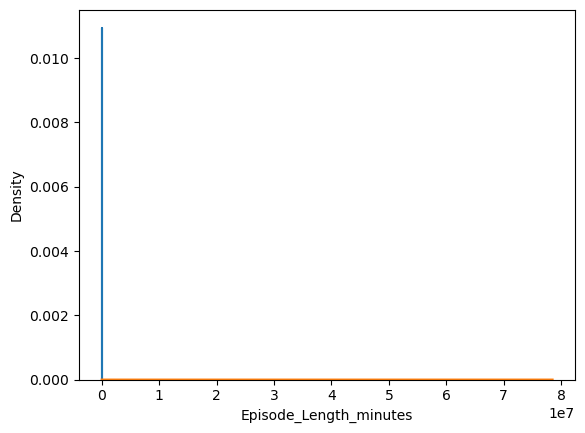

In [163]:
col = \
    'Episode_Length_minutes'
sns.kdeplot(x=train[col])
sns.kdeplot(x=test[col])

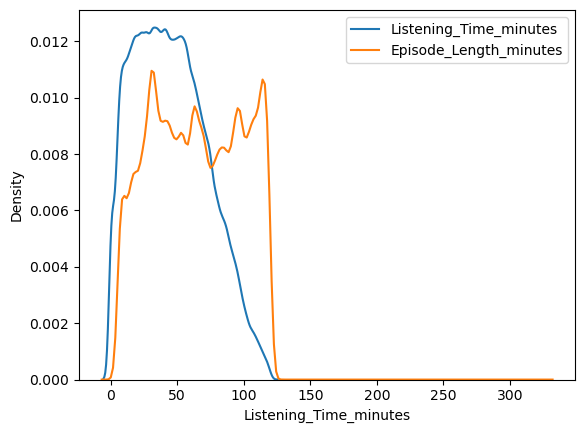

In [159]:
sns.kdeplot(x=train['Listening_Time_minutes'], label = 'Listening_Time_minutes')
sns.kdeplot(x=train['Episode_Length_minutes'], label = 'Episode_Length_minutes')
plt.legend()
plt.show()

In [142]:
train.loc[:, num_cols].corr()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
Episode_Length_minutes,1.00,0.02,-0.01,-0.05,0.92
Host_Popularity_percentage,0.02,1.00,0.02,-0.02,0.05
Guest_Popularity_percentage,-0.01,0.02,1.00,0.01,-0.02
Number_of_Ads,-0.05,-0.02,0.01,1.00,-0.12
Listening_Time_minutes,0.92,0.05,-0.02,-0.12,1.00


<Axes: ylabel='Listening_Time_minutes'>

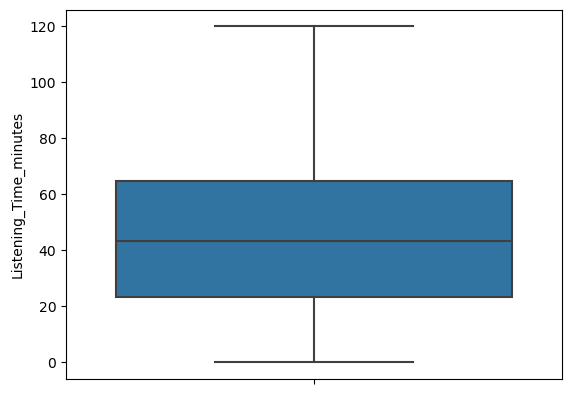

In [143]:
sns.boxplot(y='Listening_Time_minutes', data=train)

In [144]:
!pip install missingno -q
import missingno as msno

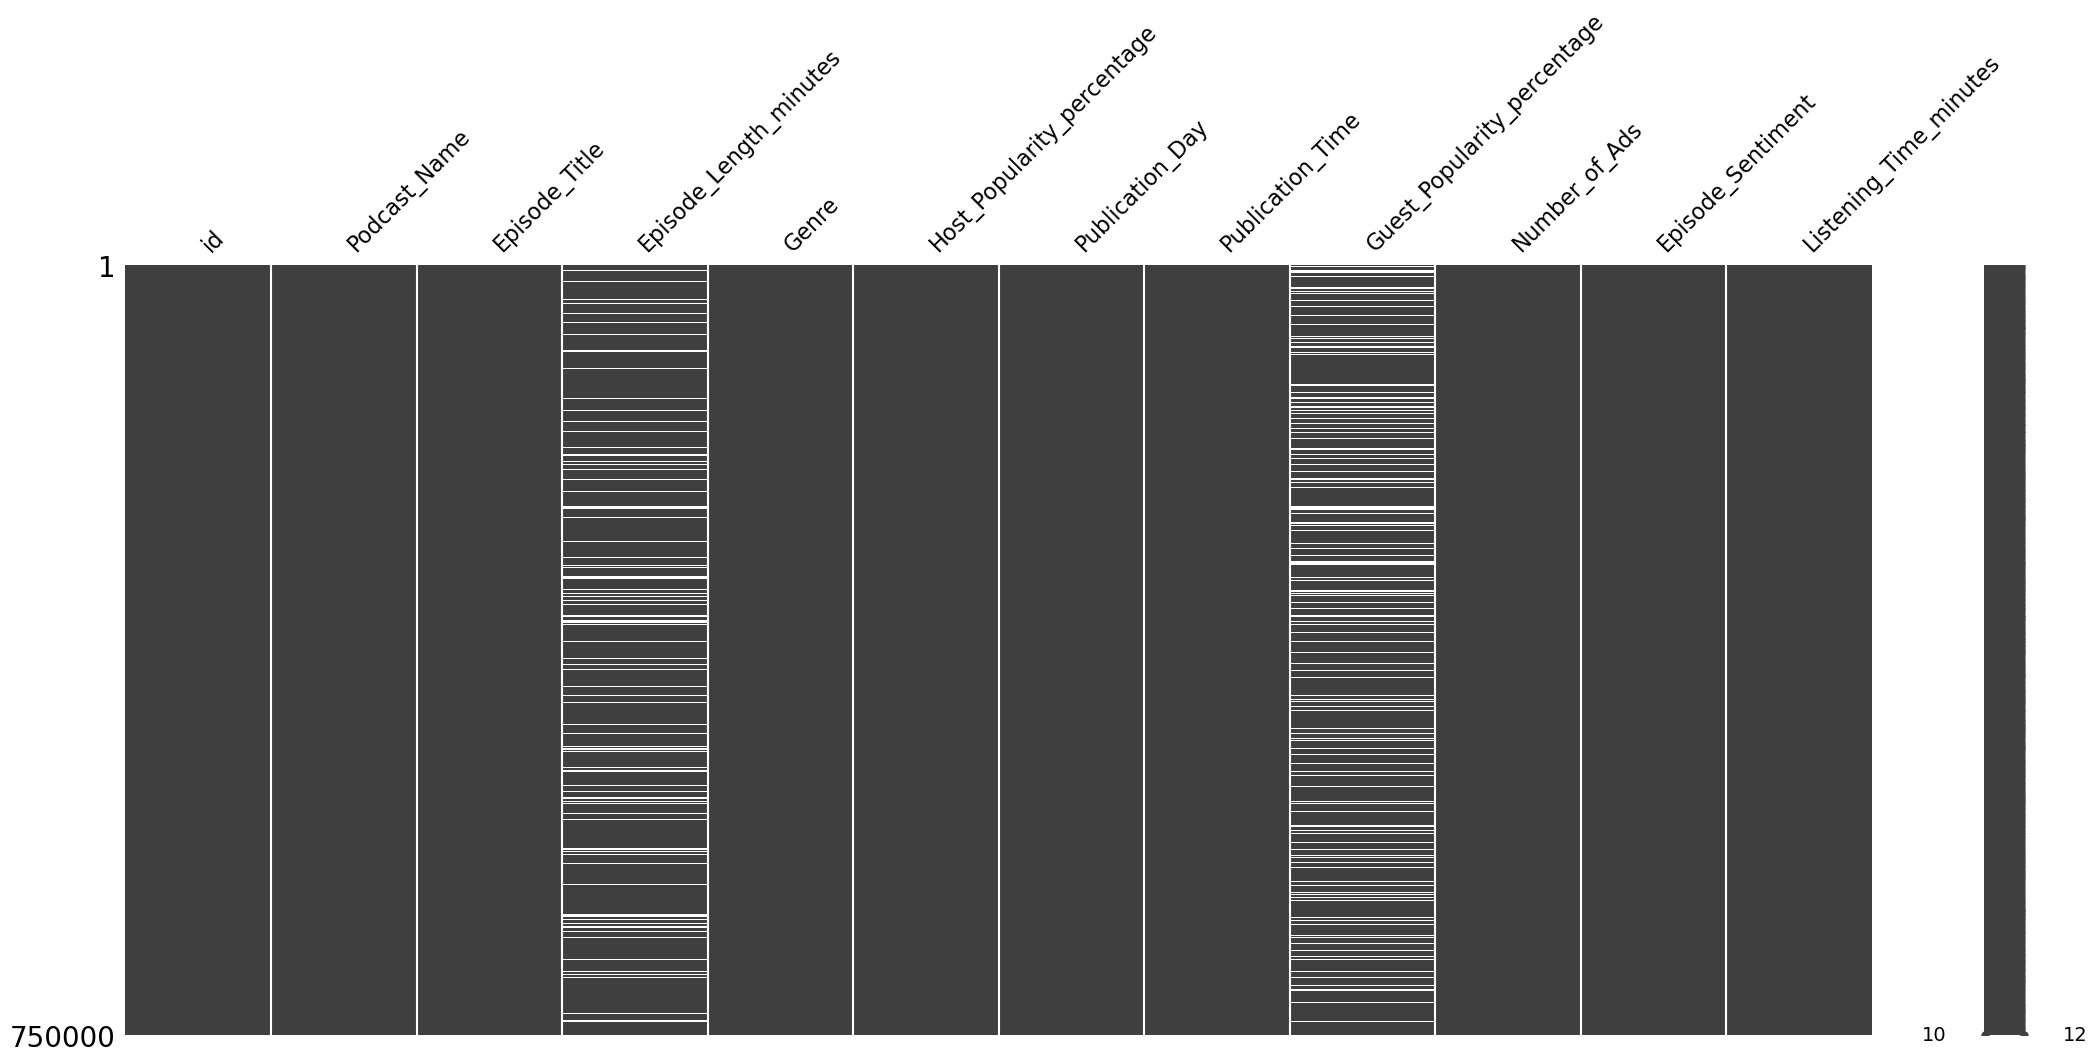

In [145]:
msno.matrix(train)  # Visual representation of missing data
plt.show()

In [146]:
# Create a new column indicating missing values (1 if missing, 0 otherwise)
missing_indicators = train[['Episode_Length_minutes', 'Guest_Popularity_percentage']].isnull().astype(int)

In [147]:
missing_indicators.corr()

,Episode_Length_minutes,Guest_Popularity_percentage
Episode_Length_minutes,1.00,0.05
Guest_Popularity_percentage,0.05,1.00


In [148]:
# Example: Check if a categorical column influences missing values in another column
train.groupby('Episode_Sentiment').agg({
    'Episode_Length_minutes': lambda x: x.isnull().mean(), 
    'Guest_Popularity_percentage': lambda x: x.isnull().mean() 
})


,Episode_Length_minutes,Guest_Popularity_percentage
Episode_Sentiment,,
Negative,0.11,0.19
Neutral,0.11,0.20
Positive,0.12,0.19


In [149]:
# Example: Check if a categorical column influences missing values in another column
train.groupby('Publication_Time').agg({
    'Episode_Length_minutes': lambda x: x.isnull().mean(), 
    'Guest_Popularity_percentage': lambda x: x.isnull().mean() 
})


,Episode_Length_minutes,Guest_Popularity_percentage
Publication_Time,,
Afternoon,0.12,0.20
Evening,0.12,0.20
Morning,0.11,0.20
Night,0.11,0.19


In [150]:
# Example: Check if a categorical column influences missing values in another column
train.groupby('Publication_Day').agg({
    'Episode_Length_minutes': lambda x: x.isnull().mean(), 
    'Guest_Popularity_percentage': lambda x: x.isnull().mean() 
})


,Episode_Length_minutes,Guest_Popularity_percentage
Publication_Day,,
Friday,0.11,0.19
Monday,0.11,0.19
Saturday,0.12,0.21
Sunday,0.11,0.19
Thursday,0.12,0.20
Tuesday,0.12,0.20
Wednesday,0.12,0.19


In [151]:
# Example: Check if a categorical column influences missing values in another column
train.groupby('Genre').agg({
    'Episode_Length_minutes': lambda x: x.isnull().mean(), 
    'Guest_Popularity_percentage': lambda x: x.isnull().mean() 
})


,Episode_Length_minutes,Guest_Popularity_percentage
Genre,,
Business,0.12,0.21
Comedy,0.12,0.18
Education,0.12,0.21
Health,0.11,0.19
Lifestyle,0.11,0.18
Music,0.11,0.19
News,0.12,0.21
Sports,0.12,0.20
Technology,0.12,0.20


In [152]:
# Example: Check if a categorical column influences missing values in another column
train.groupby('Episode_Title').agg({
    'Episode_Length_minutes': lambda x: x.isnull().mean(), 
    'Guest_Popularity_percentage': lambda x: x.isnull().mean() 
})


,Episode_Length_minutes,Guest_Popularity_percentage
Episode_Title,,
Episode 1,0.11,0.22
Episode 10,0.11,0.22
Episode 100,0.12,0.24
Episode 11,0.11,0.20
Episode 12,0.10,0.18
...,...,...
Episode 95,0.11,0.21
Episode 96,0.09,0.19
Episode 97,0.11,0.20


In [153]:
# Example: Check if a categorical column influences missing values in another column
train.groupby('Podcast_Name').agg({
    'Episode_Length_minutes': lambda x: x.isnull().mean(), 
    'Guest_Popularity_percentage': lambda x: x.isnull().mean() 
})


,Episode_Length_minutes,Guest_Popularity_percentage
Podcast_Name,,
Athlete's Arena,0.11,0.18
Brain Boost,0.11,0.20
Business Briefs,0.12,0.23
Business Insights,0.12,0.22
Comedy Corner,0.12,0.19
Crime Chronicles,0.11,0.18
Criminal Minds,0.12,0.20
Current Affairs,0.13,0.19
Daily Digest,0.12,0.20


In [161]:
train.groupby('Podcast_Name')['Listening_Time_minutes'].mean().sort_values(ascending=False)

Podcast_Name
Melody Mix            48.11
Money Matters         47.88
Crime Chronicles      47.68
Business Briefs       47.12
Study Sessions        47.05
Gadget Geek           47.03
Sports Weekly         46.97
Tune Time             46.90
Mind & Body           46.84
Detective Diaries     46.76
Athlete's Arena       46.63
Home & Living         46.40
True Crime Stories    46.26
Market Masters        46.16
Tech Talks            46.16
Music Matters         46.09
Mystery Matters       46.02
Wellness Wave         45.92
Innovators            45.87
Humor Hub             45.83
Learning Lab          45.72
Daily Digest          45.70
Fitness First         45.62
Educational Nuggets   45.57
Lifestyle Lounge      45.55
Fashion Forward       45.46
Global News           45.43
Life Lessons          45.30
Health Hour           45.21
Funny Folks           45.09
Style Guide           45.07
Healthy Living        44.97
Digital Digest        44.77
Sport Spot            44.71
Sound Waves           44.57
Tech Tr

In [162]:
train.groupby('Episode_Title')['Listening_Time_minutes'].mean().sort_values(ascending=False)

Episode_Title
Episode 25   51.22
Episode 45   50.55
Episode 54   49.34
Episode 59   49.31
Episode 31   49.27
              ... 
Episode 38   42.37
Episode 77   42.09
Episode 98   41.31
Episode 3    41.23
Episode 63   40.62
Name: Listening_Time_minutes, Length: 100, dtype: float64

# Outliers

In [190]:
outliers  = 'Episode_Length_minutes > 140 or Number_of_Ads > 3'

In [193]:
train.query(outliers)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
101637,101637,Home & Living,Episode 16,325.24,Lifestyle,50.69,Tuesday,Afternoon,15.01,0.00,Positive,64.32
211159,211159,Wellness Wave,Episode 83,64.83,Health,48.46,Sunday,Evening,NaN,53.37,Positive,50.45
283606,283606,Health Hour,Episode 15,109.93,Health,67.81,Sunday,Morning,77.90,103.91,Neutral,103.90
436577,436577,Sports Central,Episode 64,115.25,Sports,28.58,Saturday,Afternoon,23.65,103.00,Neutral,103.13
495919,495919,Comedy Corner,Episode 79,64.83,Comedy,48.37,Saturday,Evening,NaN,53.42,Neutral,50.45
537705,537705,Sound Waves,Episode 64,112.27,Music,28.95,Saturday,Morning,10.15,103.75,Neutral,103.13
567235,567235,Detective Diaries,Episode 21,16.13,True Crime,49.11,Tuesday,Evening,43.17,12.00,Positive,6.49
602553,602553,Sound Waves,Episode 53,112.27,Music,28.19,Tuesday,Morning,23.15,103.25,Neutral,103.13
672139,672139,Sound Waves,Episode 35,115.74,Music,28.95,Tuesday,Afternoon,23.50,103.25,Neutral,103.13
683147,683147,Crime Chronicles,Episode 15,109.93,True Crime,59.66,Tuesday,Evening,77.91,103.88,Neutral,103.90


In [194]:
test.query(outliers)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
37939,787939,Life Lessons,Episode 94,89.84,Lifestyle,60.79,Sunday,Afternoon,62.13,89.12,Neutral
54434,804434,Current Affairs,Episode 36,"7,575.00",News,89.54,Saturday,Night,NaN,2.00,Negative
56597,806597,Market Masters,Episode 23,"78,486,264.00",Business,55.45,Monday,Evening,48.50,0.00,Positive
178393,928393,Tech Trends,Episode 59,7.15,Technology,71.90,Sunday,Morning,17.39,"2,063.00",Positive


In [204]:
model = LinearRegression()
model.fit(train.query('Number_of_Ads >3')[['Number_of_Ads']], train.query('Number_of_Ads >3')['Listening_Time_minutes'])


LinearRegression()

In [205]:
model.coef_

array([1.05806164])

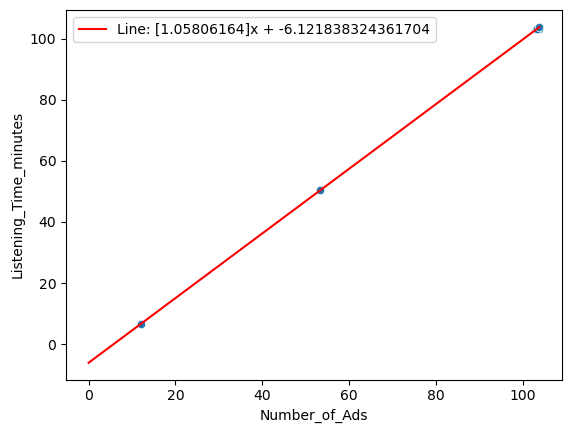

In [208]:
sns.scatterplot(train.query('Number_of_Ads >3'), x = 'Number_of_Ads', y = 'Listening_Time_minutes')
# Define the regression line
coef = model.coef_  # Replace with your actual coefficient
intercept = model.intercept_  # Replace with your actual intercept

# Generate x values for the line
x_values = np.linspace(train['Number_of_Ads'].min(), train['Number_of_Ads'].max(), 100)
y_values = coef * x_values + intercept

# Plot the regression line
plt.plot(x_values, y_values, color='red', label=f'Line: {coef}x + {intercept}')

# Show the plot with labels
plt.legend()
plt.show()